In [3]:
from csi.pipeline import *
from csi.util import *
import matplotlib.pyplot as plt

files = [
  '/dataset/YTCdataset/letitbe/test.mp3'
]
multipliers = [1, 2, 3, 4, 8]
ssm_params = {'width':1, 'mode':'affinity', 'sym':True}
checkerboard = profiles.SSMCheckerboardBox(**ssm_params)

In [4]:
pipeline = Pipeline()
pipeline.use_feature(features.ChromagramCENS(hop_length=2**9))
#pipeline.create_profiles(profiles.SimpleFast(), multipliers)
pipeline.create_profiles(checkerboard, multipliers)
pipeline.detect_peaks(peak_detection.FindPeaks())
pipeline.tokenize(tokenizers.NearestChildrenSegment(length=3, connections=3, n_bits=8))
pipeline.run(files)

Reading files
reading file /dataset/YTCdataset/letitbe/test.mp3 


/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Processing features
processing feature => /dataset/YTCdataset/letitbe/test.mp3
Creating profiles
creating profiles - 1 of 5 
creating profiles - 2 of 5 
creating profiles - 3 of 5 
creating profiles - 4 of 5 
creating profiles - 5 of 5 
Detecting peaks
Creating tokens
Done


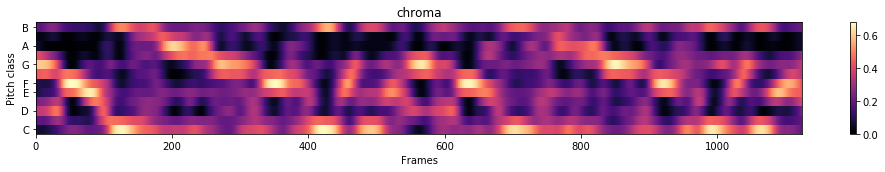

In [10]:
plt.figure(figsize=(14, 2.5))
plot_chroma(song.feature.data)
plt.tight_layout()

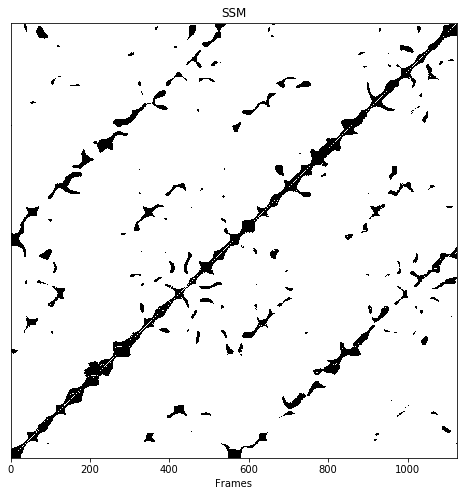

In [12]:
plt.figure(figsize=(8, 8))
plot_ssm(song.tmp['ssm'])

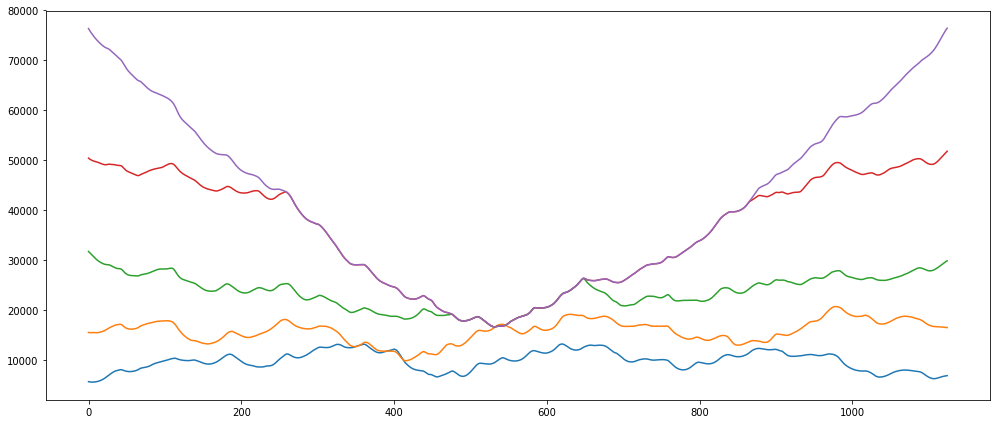

In [8]:
plt.figure(figsize=(14, 6))
plot_profiles(song.profiles)
plt.tight_layout()

In [9]:
song.peaks

[array([  42,  113,  138,  185,  260,  304,  326,  361,  400,  447,  476,
         513,  542,  583,  620,  658,  669,  728,  751,  799,  837,  877,
         898,  945,  970, 1016, 1068]),
 array([   6,   41,  103,  187,  257,  288,  303,  362,  390,  438,  448,
         474,  512,  542,  584,  631,  645,  675,  708,  728,  744,  757,
         796,  832,  870,  901,  978, 1017, 1069]),
 array([  25,   96,  109,  181,  223,  258,  302,  361,  401,  439,  475,
         509,  585,  648,  733,  758,  779,  794,  833,  878,  901,  952,
         982, 1025, 1087]),
 array([  26,  108,  182,  220,  258,  360,  438,  509,  585,  648,  676,
         759,  842,  879,  908,  981, 1025, 1087]),
 array([248, 360, 438, 509, 585, 648, 676, 759, 842, 985])]